# Importing necessary libraries

In [1]:
# Filtering out warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
prevData=pd.read_csv("previous_application.csv")
appData=pd.read_csv("application_data.csv")

In [4]:
prevData.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
appData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Description of Datasets
Dataset 'prevData' contains information about the client’s previous loan data.
It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

Dataset 'appData' ontains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

# Clean the data

### Identify nulls or missing values, drop columns

In [6]:
#Listing columns having more than 30% null values in prevData
emptycol1=prevData.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [7]:
#Drop columns having more than 30% null values in prevData
emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
prevData.drop(labels=emptycol1,axis=1,inplace=True)
prevData.shape

(1670214, 22)

In [8]:
#Listing columns having more than 30% null values in appData
emptycol2=appData.isnull().sum()
emptycol2=emptycol2[emptycol2.values>(0.3*len(emptycol2))]
len(emptycol2)

64

In [9]:
#Drop columns having more than 30% null values in appData
emptycol2 = list(emptycol2[emptycol2.values>=0.3].index)
appData.drop(labels=emptycol2,axis=1,inplace=True)
appData.shape

(307511, 58)

### Drop unwanted columns

In [10]:
#Drop unwanted columns in prevData
unwanted1=['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
           'DAYS_DECISION']
prevData.drop(labels=unwanted1,axis=1,inplace=True)

In [11]:
#Drop unwanted columns in appData
unwanted2=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
appData.drop(labels=unwanted2,axis=1,inplace=True)

In [12]:
# Describing the organization type column
appData['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [13]:
# Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column

appData=appData.drop(appData.loc[appData['ORGANIZATION_TYPE']=='XNA'].index)
appData[appData['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [14]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

appData[numeric_columns]=appData[numeric_columns].apply(pd.to_numeric)
appData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


# Description of cleaned data

In [15]:
prevData.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,AMT_CREDIT,SELLERPLACE_AREA
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06
mean,1.923089e+06,2.783572e+05,1.752339e+05,1.961140e+05,3.139511e+02
std,5.325980e+05,1.028148e+05,2.927798e+05,3.185746e+05,7.127443e+03
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,-1.000000e+00
25%,1.461857e+06,1.893290e+05,1.872000e+04,2.416050e+04,-1.000000e+00
50%,1.923110e+06,2.787145e+05,7.104600e+04,8.054100e+04,3.000000e+00
75%,2.384280e+06,3.675140e+05,1.803600e+05,2.164185e+05,8.200000e+01
max,2.845382e+06,4.562550e+05,6.905160e+06,6.905160e+06,4.000000e+06


In [16]:
prevData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_APPLICATION         1670214 non-null  float64
 4   AMT_CREDIT              1670213 non-null  float64
 5   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 6   NAME_CONTRACT_STATUS    1670214 non-null  object 
 7   NAME_PAYMENT_TYPE       1670214 non-null  object 
 8   CODE_REJECT_REASON      1670214 non-null  object 
 9   NAME_CLIENT_TYPE        1670214 non-null  object 
 10  NAME_GOODS_CATEGORY     1670214 non-null  object 
 11  NAME_PORTFOLIO          1670214 non-null  object 
 12  NAME_PRODUCT_TYPE       1670214 non-null  object 
 13  CHANNEL_TYPE            1670214 non-null  object 
 14  SE

In [17]:
appData.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
count,252137.000000,252137.000000,252137.000000,2.521370e+05,2.521370e+05,252125.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000
mean,278114.643103,0.086600,0.498515,1.759141e+05,6.113985e+05,27812.325168,0.020894,-14769.133174,-2384.169325,-4635.430849,-2800.639724,12.203302,0.017241,0.061919,0.049588,0.089769,0.281065,0.218988
std,102815.635309,0.281248,0.763161,2.588516e+05,4.065272e+05,14647.759104,0.013874,3662.573769,2338.360162,3252.169156,1515.360629,3.299799,0.130167,0.241008,0.217093,0.285851,0.449520,0.413561
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,0.000290,-25200.000000,-17912.000000,-22928.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189035.000000,0.000000,0.000000,1.125000e+05,2.779695e+05,17073.000000,0.010006,-17563.000000,-3175.000000,-6952.000000,-4177.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278064.000000,0.000000,0.000000,1.575000e+05,5.212800e+05,25834.500000,0.018850,-14573.000000,-1648.000000,-4265.000000,-2886.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367165.000000,0.000000,1.000000,2.115000e+05,8.292240e+05,35617.500000,0.028663,-11775.000000,-767.000000,-1845.000000,-1487.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,0.072508,-7489.000000,0.000000,0.000000,0.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
appData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   252137 non-null  int64  
 1   TARGET                       252137 non-null  int64  
 2   NAME_CONTRACT_TYPE           252137 non-null  object 
 3   CODE_GENDER                  252137 non-null  object 
 4   FLAG_OWN_CAR                 252137 non-null  object 
 5   FLAG_OWN_REALTY              252137 non-null  object 
 6   CNT_CHILDREN                 252137 non-null  int64  
 7   AMT_INCOME_TOTAL             252137 non-null  float64
 8   AMT_CREDIT                   252137 non-null  float64
 9   AMT_ANNUITY                  252125 non-null  float64
 10  NAME_INCOME_TYPE             252137 non-null  object 
 11  NAME_EDUCATION_TYPE          252137 non-null  object 
 12  NAME_FAMILY_STATUS           252137 non-null  object 
 13 

# Preparing data for analysis

#### Creating bins for variables

In [19]:
# Creating bins for income amount

income_bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
income_slots = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

appData['AMT_INCOME_RANGE']=pd.cut(appData['AMT_INCOME_TOTAL'],bins=income_bins,labels=income_slots)

In [20]:
# Creating bins for Credit amount

credit_bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
credit_slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

appData['AMT_CREDIT_RANGE']=pd.cut(appData['AMT_CREDIT'],bins=credit_bins,labels=credit_slots)

In [21]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_df=appData.loc[appData["TARGET"]==0]
target1_df=appData.loc[appData["TARGET"]==1]

In [22]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(target0_df)/len(target1_df),2)

10.55

## Understanding Previous applicants data

#### Study Credit amount granted by the company compared to Loan contract type

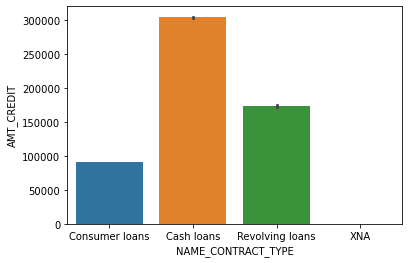

In [23]:
#Basic trend on Credit Amount based on Contract type
sns.barplot(x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', data=prevData)

Inferences:
- The Credit amount is highest for the 'Cash Loan' applications, followed by 'Revolving loans' and 'Consumer loans'.
- Cash loan applications seem to be the target application to get a higher Credit amount.

#### Study Contract status compared to the Credit Amount

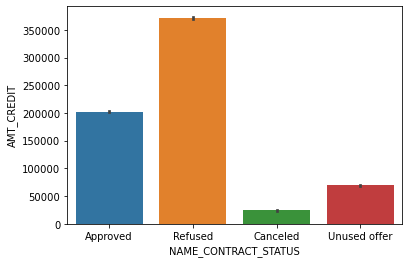

In [24]:
#Basic trend on Credit Amount based on Contract type
sns.barplot(x='NAME_CONTRACT_STATUS', y='AMT_CREDIT', data=prevData)

- The loan applications with 'Credit amount' greater than 350,000 are Refused mostly.
- The loan applications with 'Credit amount' upto 200,000 are Approved mostly.

#### Study the relationship between Contract Type and Contract status based on Application amount

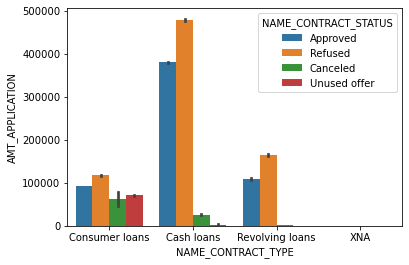

In [25]:
#Study relationship between the Contract type, Contract Status and Application Amount.
sns.barplot(x='NAME_CONTRACT_TYPE', y='AMT_APPLICATION', hue='NAME_CONTRACT_STATUS', data=prevData)

#### Inferences:
- Highest application amounts have been received for 'Cash Loans'.
- Cash Loans applied for 400K-500k are mostly rejected.

#### Study the trends of Rejection reasons of a loan application with Contract Type

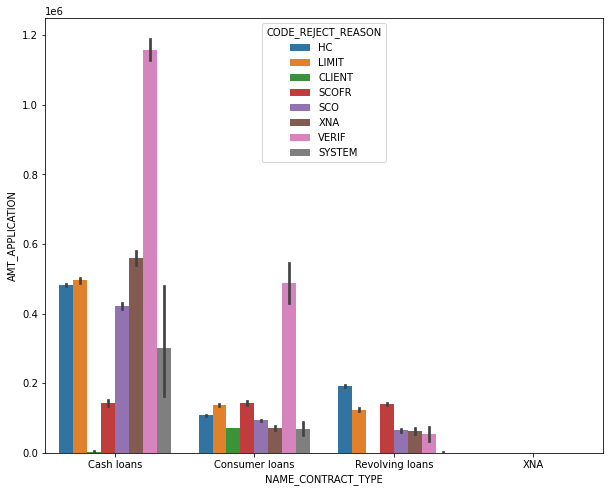

In [26]:
prevData1=prevData[(prevData['CODE_REJECT_REASON'] != 'XAP')]
plt.figure(figsize=(10,8))
sns.barplot(x='NAME_CONTRACT_TYPE', y='AMT_APPLICATION', hue='CODE_REJECT_REASON', data=prevData1)

### Inferences
- Most Cash loans and Consumer loans are rejected due to Verification issues (VERIF).
- 'HC' and 'LIMIT' are the next most popular reasons for a loan not being approved.

# Analyzing Current Application data

In [27]:
# Creating a function to use for Logarithmic scale plots

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

#### Distribution of Income range

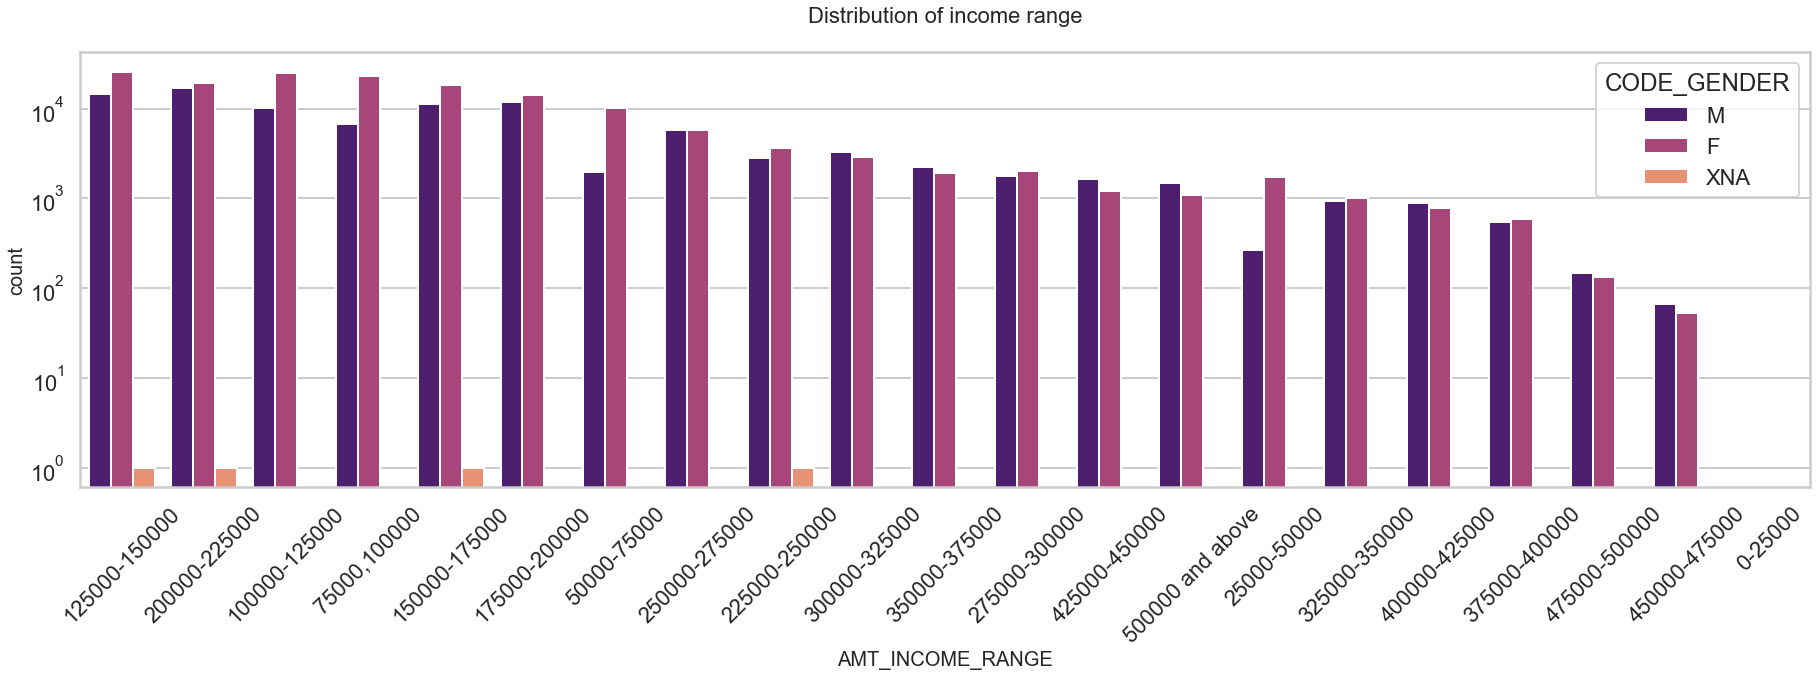

In [28]:
# PLotting for income range
uniplot(appData,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

#### Inferences
1. There are more Women having  an income range between 75,000 - 2,25,000.
2. Majority of the customers fall under an Income range of 100000 to 225000.
3. There are very few customers having income above 400000 comparitive to the other income ranges.

#### Distribution of Income type

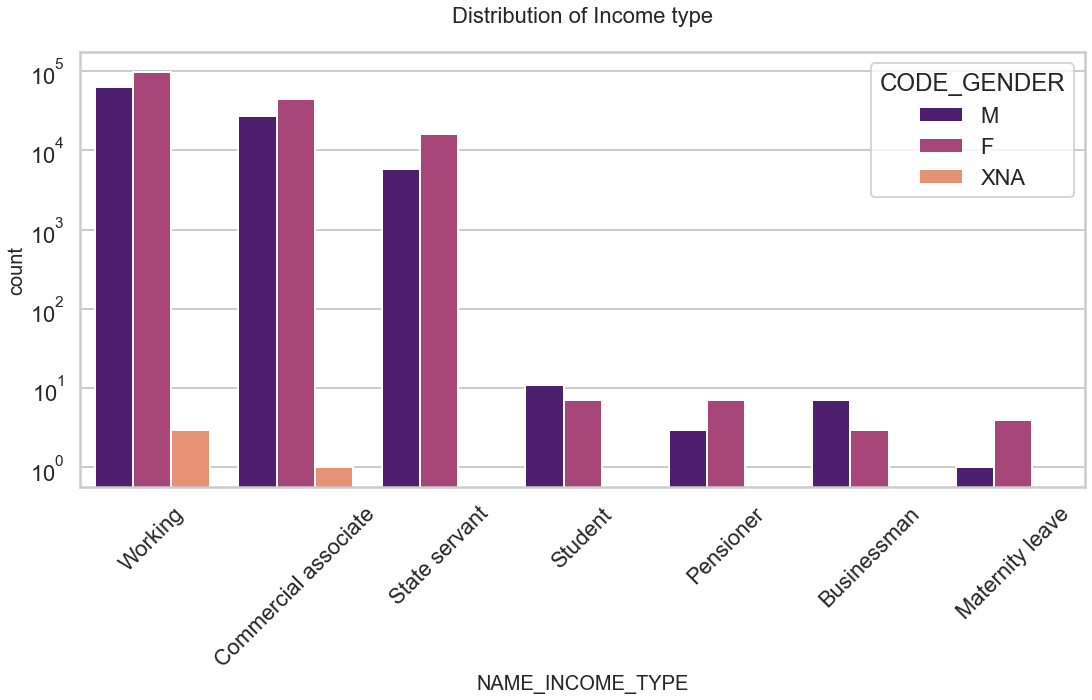

In [29]:
# Plotting for Income type

uniplot(appData,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

#### Inferences
1. Majority of the customers applying for loan are either 'Working', 'Commercial associate', 'Pensioners' or 'State Servant'. So customers from these categories can be considered as the highest priority targets for the company.
2. In all of the above categories, there are slightly more women than men.
3. Very few customers from the 'Unemployed', 'Student', 'Businessman', 'Maternity leave' categories are applying for a loan. So it can be assumed that these people are the last priority targets.

#### Distribution of Organization Type for current applicants

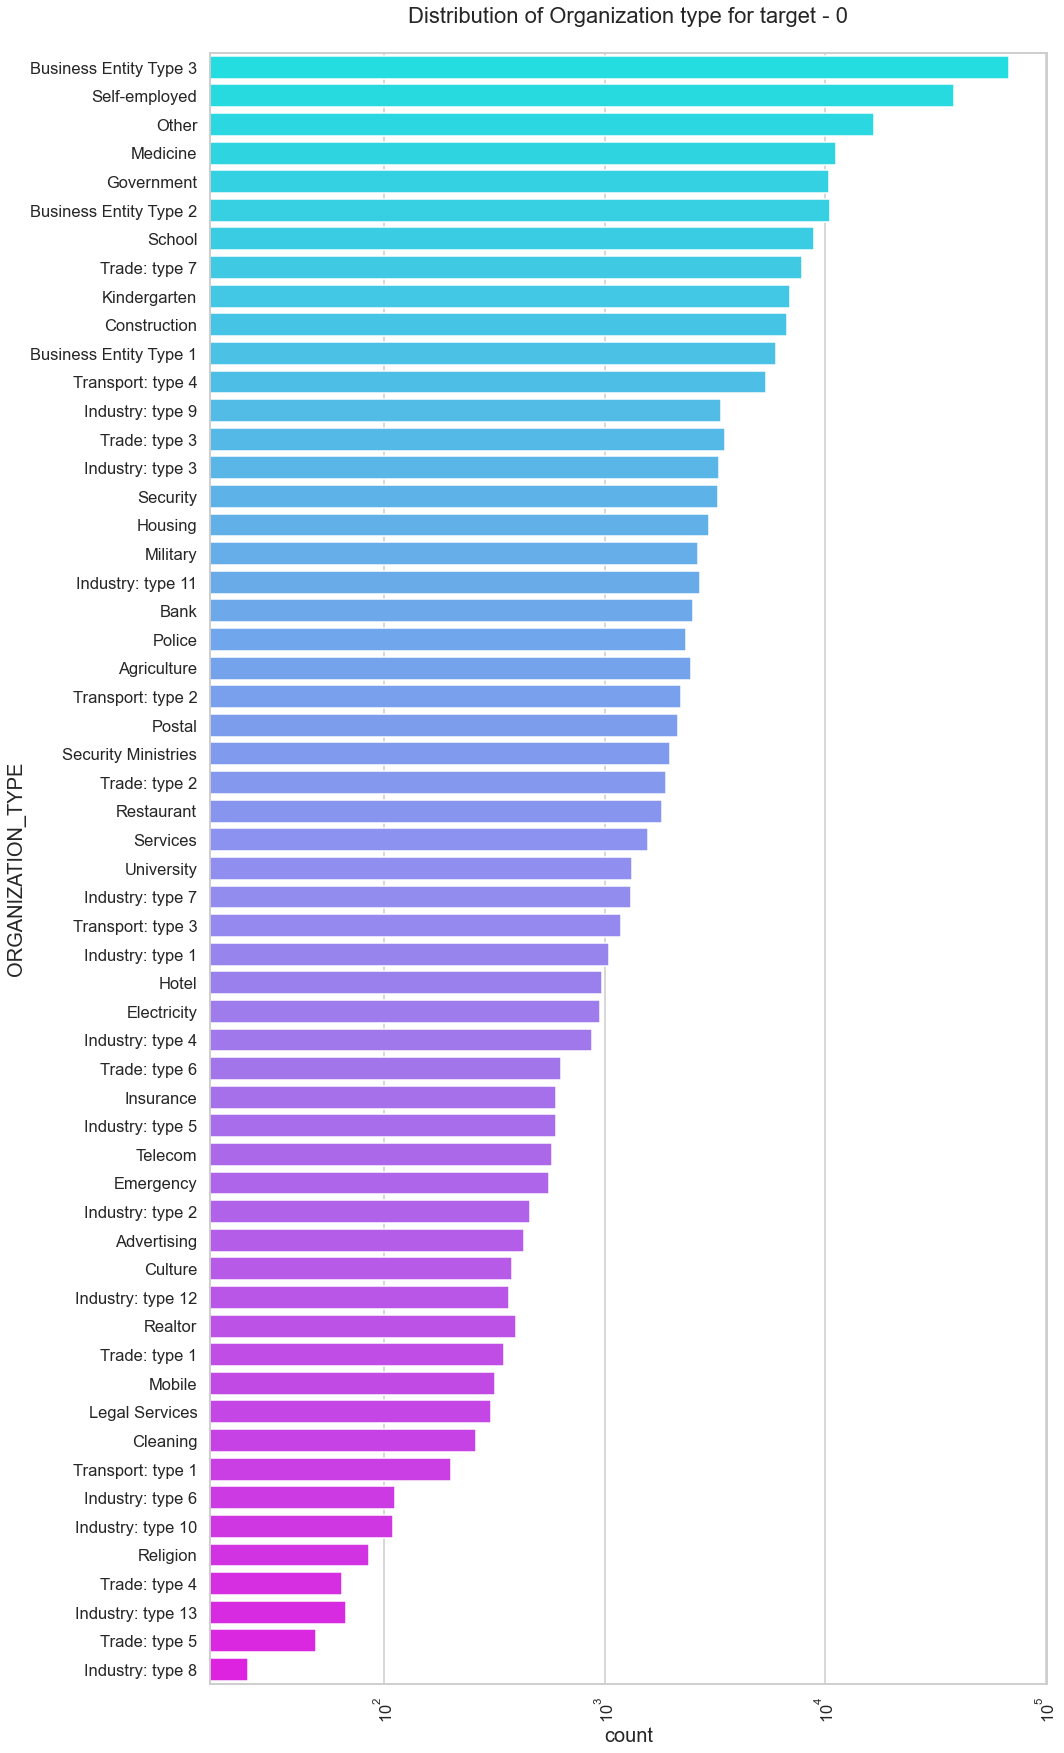

In [30]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=appData,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

#### Inferences
1. Majority of the Customers who have applied for loans work for the organization types ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ or ‘Government’. 
2. Very few customers belong to Industry type 8,type 6, type 10, religion and trade type 5, type 4.

#### Distribution of Income type among the customers having difficulty in paying the installments

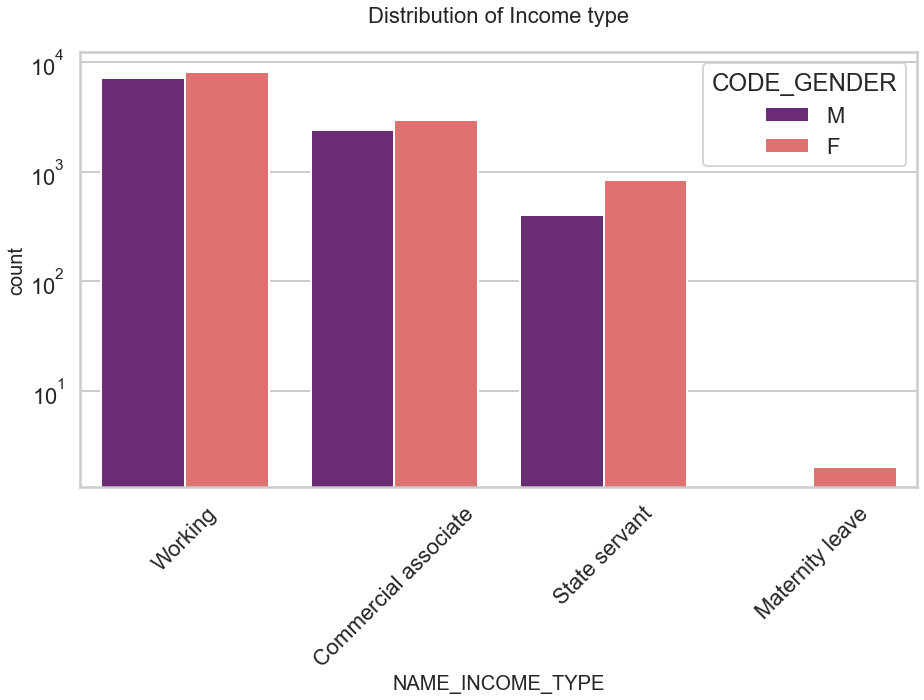

In [31]:
# Plotting for Income type

uniplot(target1_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

#### Inferences
1. Majority of the customers that have difficulties in paying installments belong to income types ‘working’, ’commercial associate’, and ‘State Servant’. These are also the categories having majority of customers.
2. Very few customers with income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’ have difficulty in paying installments. These are also the categories having least number of customers.

#### Distribution of Organization Type among customers having difficulties in paying installments

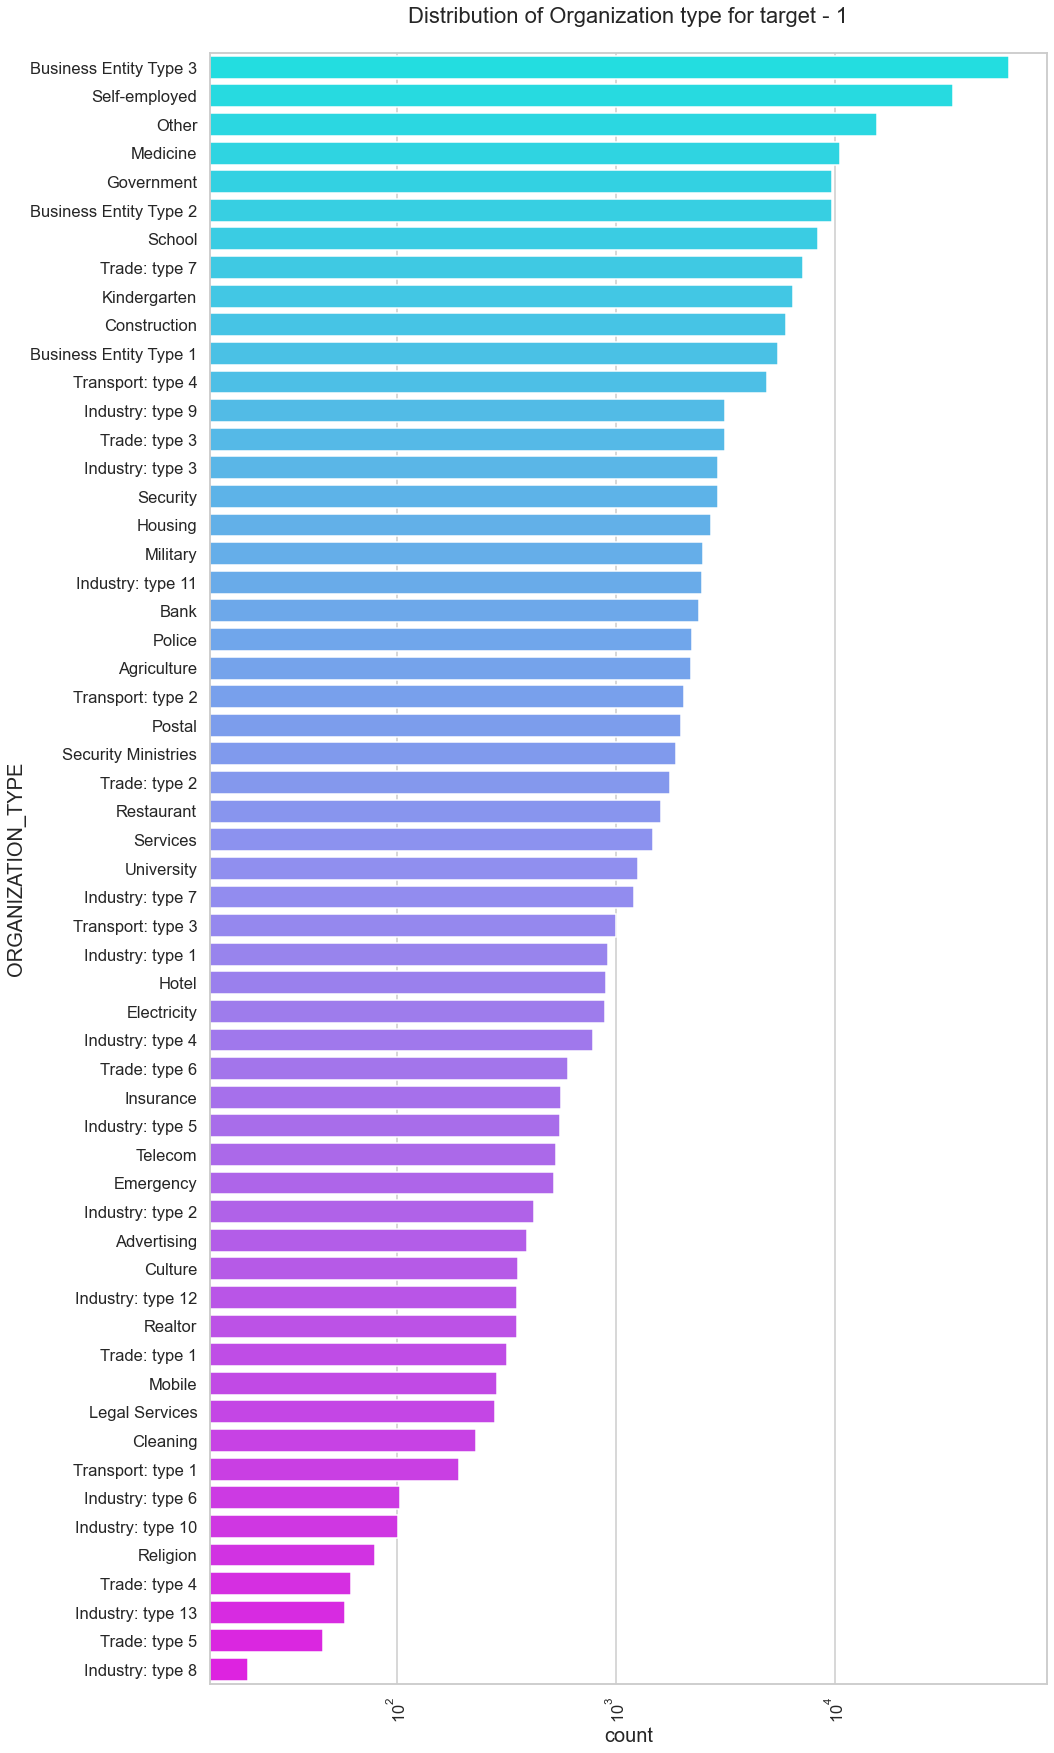

In [32]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

#### Inferences
1. Majority of the customers having difficulty in paying installments belong to the organization type ‘Business entity Type 3’, ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
2. The distribution results in the customers having difficulty in paying installments is similar to the results of distribution trends in the complete dataset.

#### Correlations between customers having difficulties in paying installments and customers that don't.

In [33]:
# Finding some correlation for numerical columns for both target 0 and 1 

target0_corr=target0_df.iloc[0:,2:]
target1_corr=target1_df.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [34]:
#Correlations for target0
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010799,-0.030579,0.266534,0.030948,0.155518,-0.119164,-0.030162,-0.022813,-0.015475,-0.005576,0.002344,0.007487,0.013295
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472217,0.110074,-0.054666,-0.060868,0.040559,-0.036702,0.073503,0.077634,0.159962,0.148281,-0.001023,-0.013856,-0.004758
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826706,0.060706,-0.169030,-0.104251,-0.015318,-0.038197,0.036923,0.015118,0.041693,0.045175,-0.040616,-0.037000,-0.011194
AMT_ANNUITY,-0.010799,0.472217,0.826706,1.000000,0.064333,-0.100290,-0.074646,0.010712,-0.027355,0.032956,0.033442,0.070856,0.069069,-0.019953,-0.024084,-0.008085
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064333,1.000000,-0.041663,0.000900,-0.042400,-0.010299,0.133213,-0.025292,0.032446,0.056814,-0.049779,-0.034808,-0.007332
DAYS_BIRTH,0.266534,-0.054666,-0.169030,-0.100290,-0.041663,1.000000,0.307787,0.265449,0.083331,0.051299,0.058627,0.038104,0.012789,0.167477,0.111539,0.029007
DAYS_EMPLOYED,0.030948,-0.060868,-0.104251,-0.074646,0.000900,0.307787,1.000000,0.126708,0.106823,0.026444,0.065435,0.086966,0.063533,0.118224,0.125954,0.069567
DAYS_REGISTRATION,0.155518,0.040559,-0.015318,0.010712,-0.042400,0.265449,0.126708,1.000000,0.036788,-0.029553,0.017715,0.015092,0.007716,0.038064,0.047339,0.027231
DAYS_ID_PUBLISH,-0.119164,-0.036702,-0.038197,-0.027355,-0.010299,0.083331,0.106823,0.036788,1.000000,0.008538,0.027302,0.020823,0.008525,0.054875,0.033427,0.001476
HOUR_APPR_PROCESS_START,-0.030162,0.073503,0.036923,0.032956,0.133213,0.051299,0.026444,-0.029553,0.008538,1.000000,0.051744,0.067352,0.053813,0.011287,-0.005971,-0.010720


In [35]:
#Correlation for target1
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.029682,0.175025,0.006823,0.110854,-0.091042,-0.040338,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.058005,-0.103026,-0.053798,0.011378,-0.051113,0.078779,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.043545,-0.200718,-0.107605,-0.021973,-0.065143,0.024616,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.028666,-0.100200,-0.060193,0.019762,-0.044128,0.021129,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,1.000000,-0.044444,-0.015246,-0.033490,-0.017779,0.109400,-0.032702,-0.008160,0.012602,-0.057239,-0.044761,-0.014753
DAYS_BIRTH,0.175025,-0.103026,-0.200718,-0.100200,-0.044444,1.000000,0.256870,0.192350,0.146246,0.041994,0.046320,0.022208,0.000356,0.145884,0.096181,0.009633
DAYS_EMPLOYED,0.006823,-0.053798,-0.107605,-0.060193,-0.015246,0.256870,1.000000,0.086286,0.104244,0.010328,0.069566,0.082264,0.056081,0.118869,0.139863,0.069316
DAYS_REGISTRATION,0.110854,0.011378,-0.021973,0.019762,-0.033490,0.192350,0.086286,1.000000,0.061563,-0.044753,0.006362,0.000896,-0.001416,0.015831,0.039204,0.026105
DAYS_ID_PUBLISH,-0.091042,-0.051113,-0.065143,-0.044128,-0.017779,0.146246,0.104244,0.061563,1.000000,0.012709,0.024860,0.013162,0.002567,0.048184,0.015838,-0.015598
HOUR_APPR_PROCESS_START,-0.040338,0.078779,0.024616,0.021129,0.109400,0.041994,0.010328,-0.044753,0.012709,1.000000,0.050953,0.063877,0.050300,0.003947,0.004775,0.002319


#### Correlation heatmap to depict Correlation for customers that don't have any payment difficulties

In [36]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice

    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

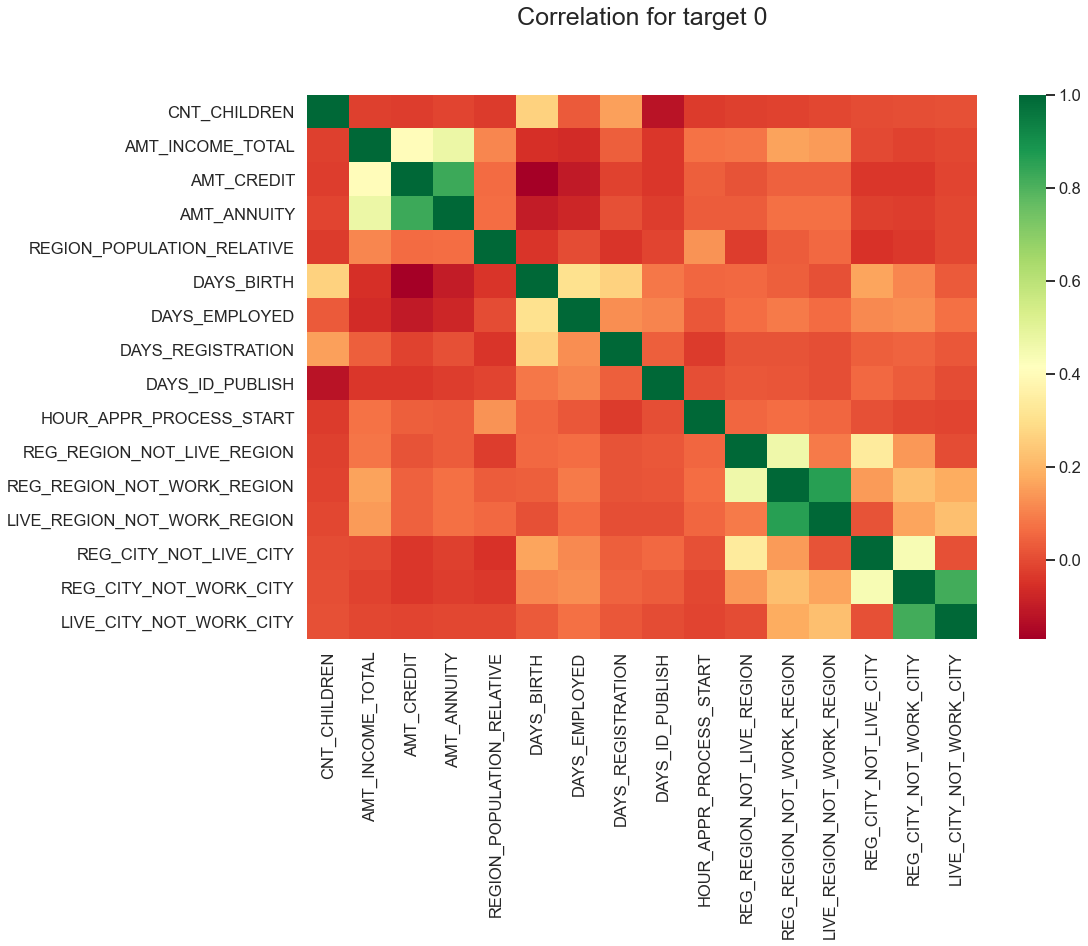

In [37]:
# For Target 0
targets_corr(data=target0,title='Correlation for target 0')

#### Inferences
1. Credit amount is inversely correlated to the date of birth, which means Credit amount is higher for younger people than older people. This is likely to imply that Older people tend to apply for loans for a larger amount than young people do.
2. Customers from a densely populated area have applied for a higher loan amount.

#### Correlation heatmap to depict Correlation for customers have payment difficulties

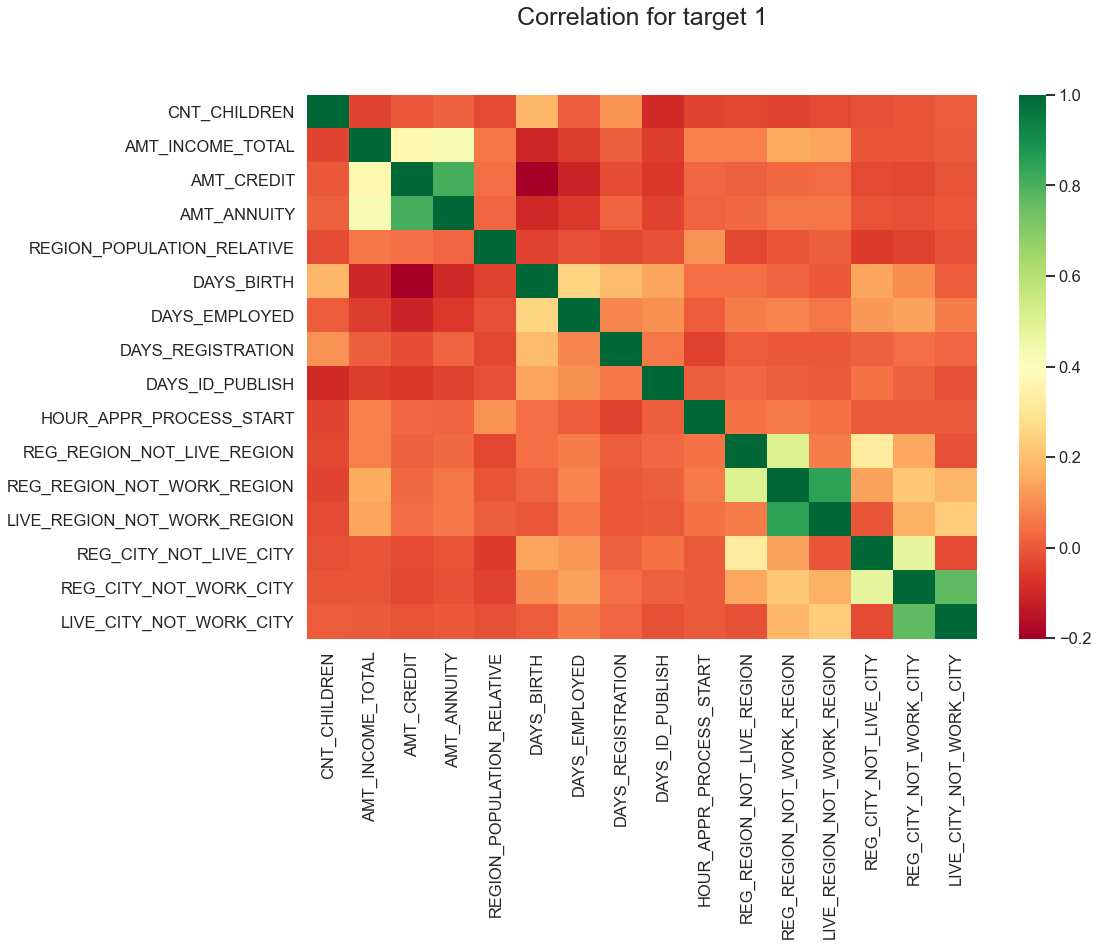

In [38]:
# For Target 1
targets_corr(data=target1,title='Correlation for target 1')

#### Inferences
1. Age has a very strong correlation with the Credit amount, as established in the previous heatmap.

#### Univariate analysis with Boxplots

In [39]:
# Box plotting for univariate variables analysis in logarithmic scale

def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =appData, y=col,orient='v')
    plt.show()

#### Distribution of credit amount

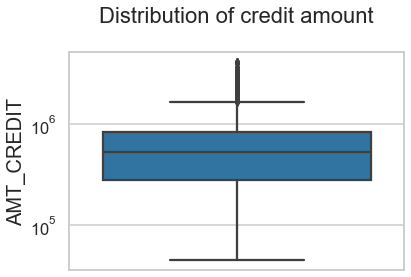

In [40]:
# Disrtibution of credit amount

univariate_numerical(data=appData,col='AMT_CREDIT',title='Distribution of credit amount')

#### Inferences
1. Some outliers are noticed in credit amount values.
2. The first quartile is bigger than third quartile for credit amount which means most of the Credit amount values are present in the first quartile.

#### Distribution of income amount

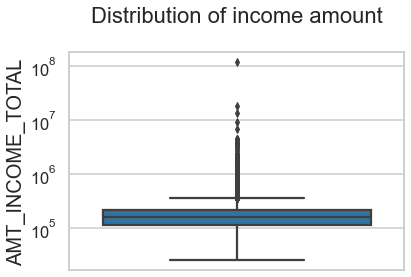

In [41]:
# Distribution of income amount

univariate_numerical(data=appData,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

#### Inferences
1. Some outliers are noticed in income amount.
2. The third quartiles is very slim for income amount.
3. Most of the clients of income are present in first quartile.

#### Distribution of Credit Amount

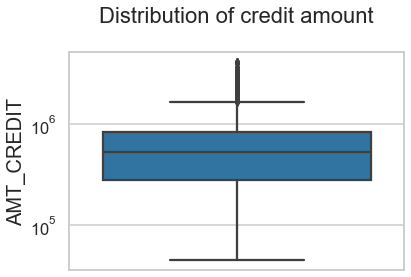

In [42]:
# Distribution of credit amount

univariate_numerical(data=appData,col='AMT_CREDIT',title='Distribution of credit amount')

#### Inferences
1. Some outliers are noticed in credit amount.
2. The first quartile is bigger than third quartile for credit amount which means most of the Credit amount values received by the Customers are present in the first quartile.

# Bivariate analysis for numerical variables

### For Target 0

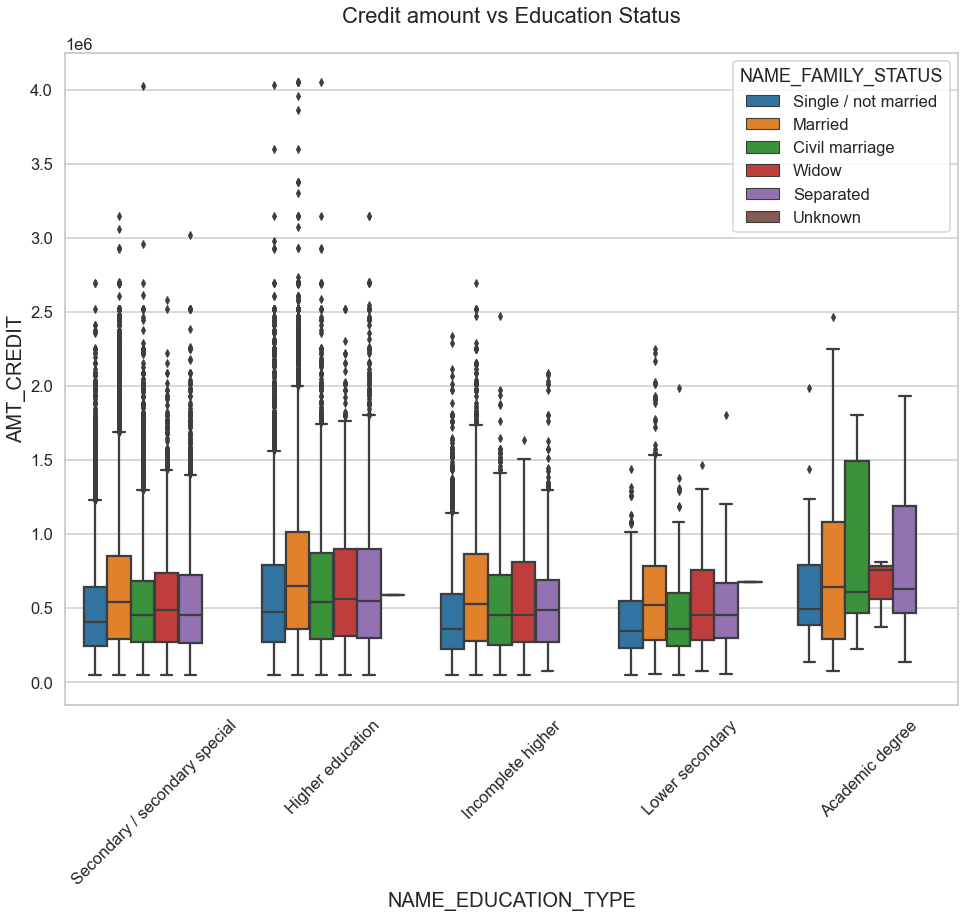

In [43]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =appData, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

#### Inferences
1. From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education have applied for higher loan amounts.
2. Customers data with higher education having family status of 'marriage', 'single' or 'civil marriage' are having more outliers. 
3. Customers with Family status as 'Civil marriage' with education type as 'Academic degree' have more number of applications the third quartile.

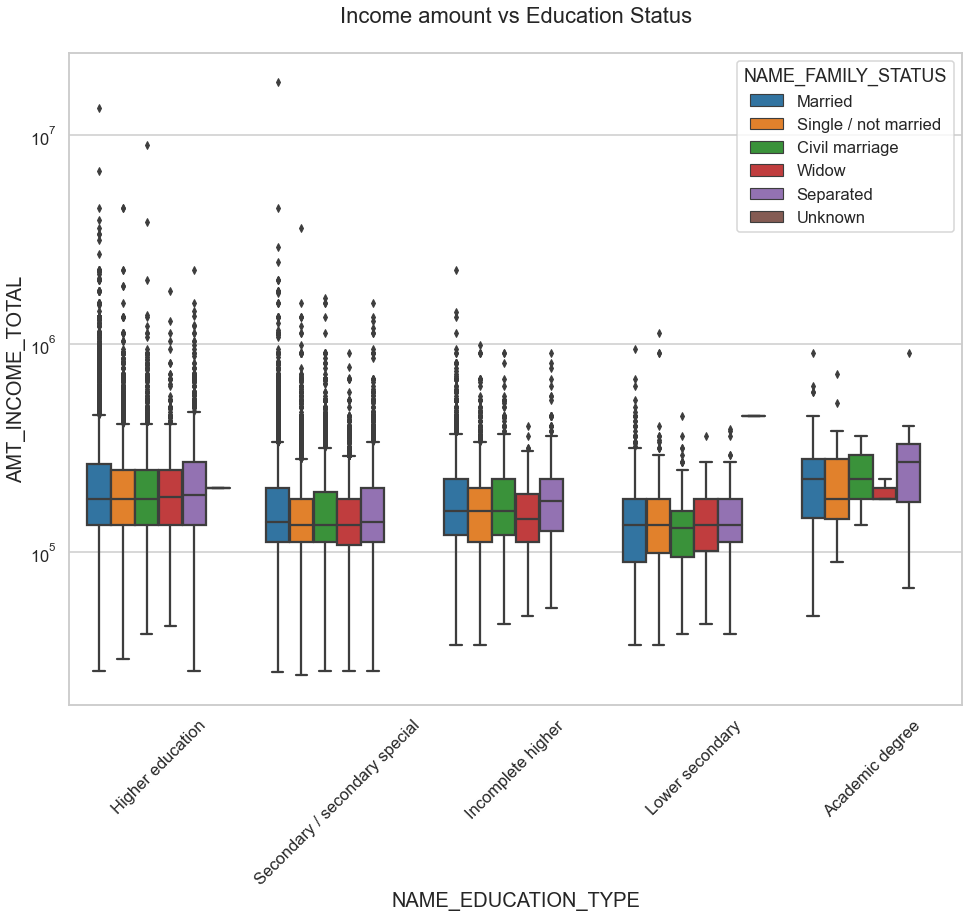

In [44]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

#### Inferences
1. Customers with 'Higher education' the income amount is mostly equal irrespective of family status.
2. Customers with education type as 'Lower secondary' having 'civil marriage' family status have lesser income than other categories.

### For Target 1

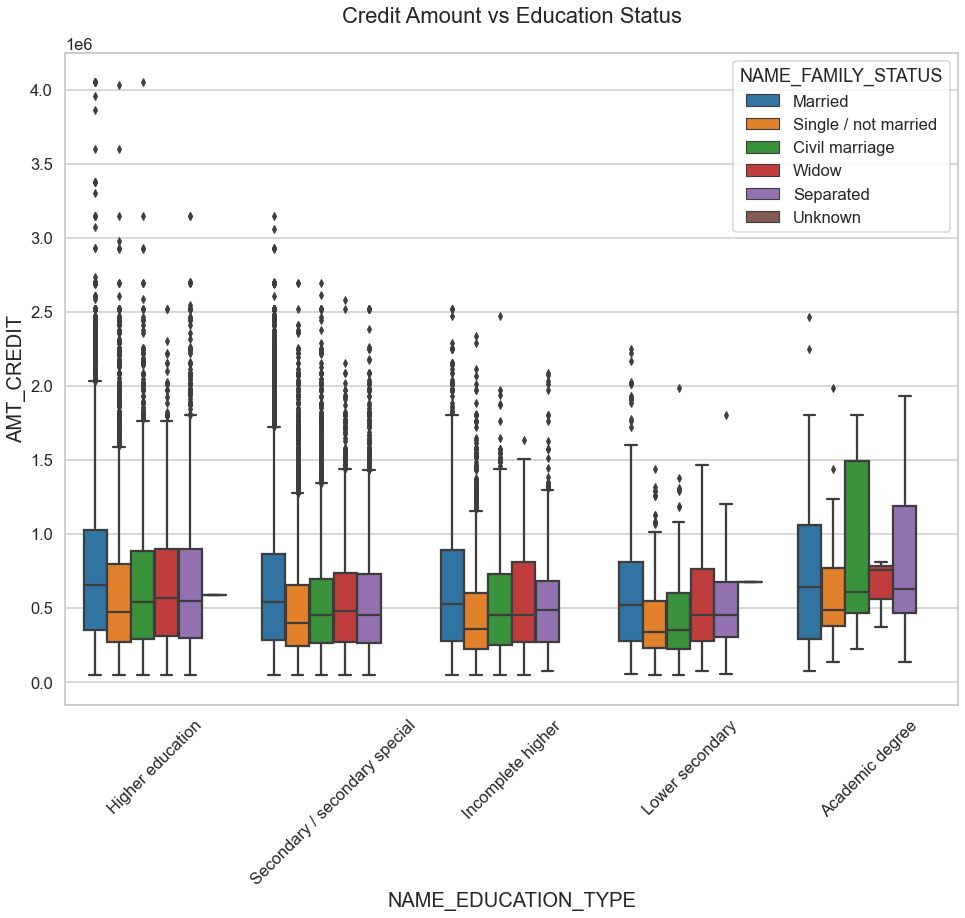

In [45]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

#### Inferences
1. Results for Target-1 customers are similar to results of Target-0 customers
2. From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education have applied for higher loan amounts.
3. Customers data with higher education having family status of 'marriage', 'single' or 'civil marriage' are having more outliers.
4. Customers with Family status as 'Civil marriage' with education type as 'Academic degree' have more number of applications the third quartile.

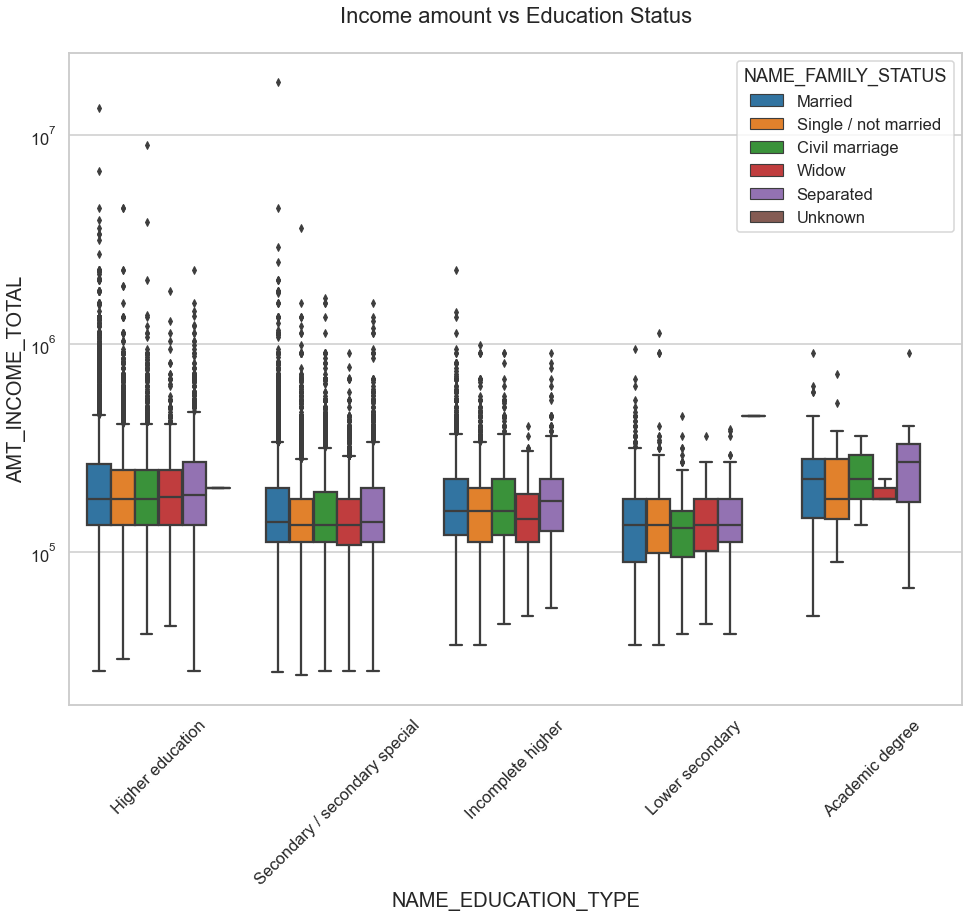

In [46]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

#### Inferences
1. The results are similar to the results for Target-0.
2. Customers with 'Academic Degree' education have slightly higher income compared to those with other kinds of education. 
3. Customers with Lower secondary education have less income than others.

# Merge and Analyse Previous and Current application data

In [47]:
new_df=pd.merge(left=appData,right=prevData,how='inner',on='SK_ID_CURR',suffixes='_x')

In [48]:
# Renaming the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

## Univariate Analysis

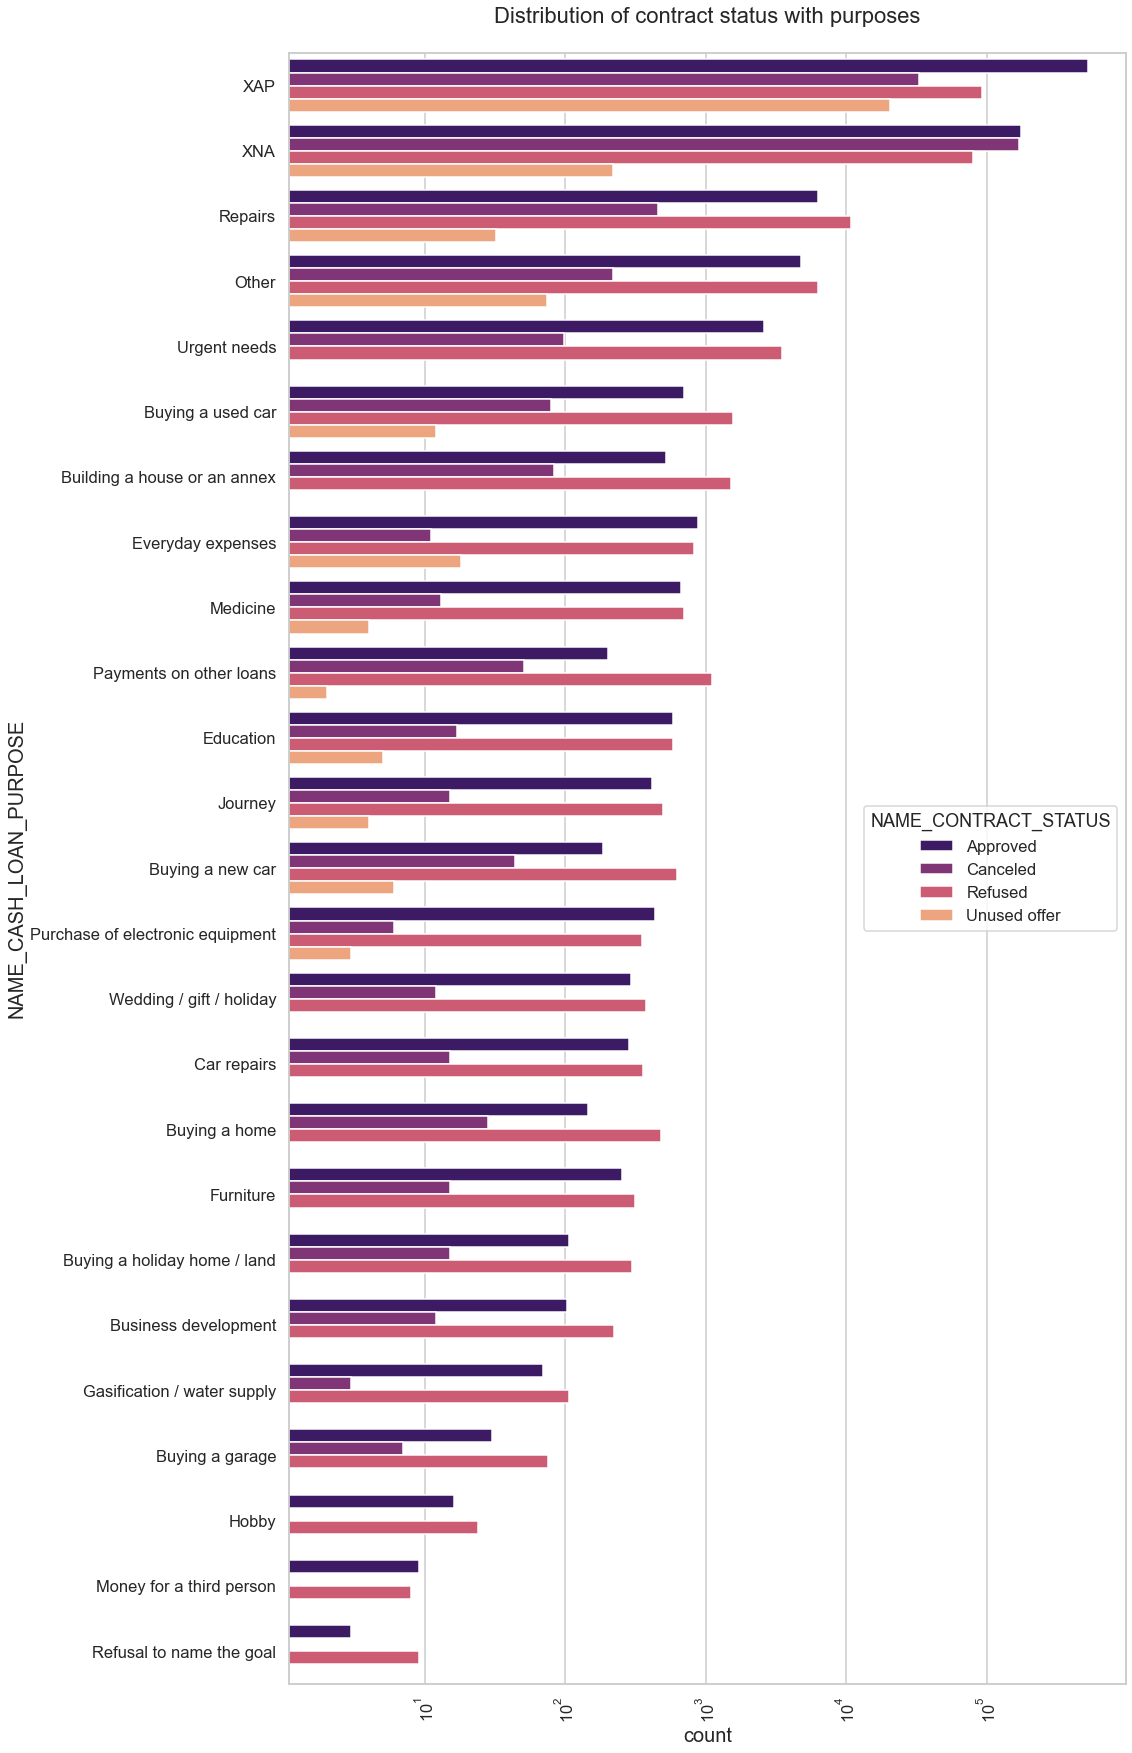

In [49]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma') 

#### Inferences
1. Most loans applied for 'Repairs' have been rejected.
2. Almost equal number of loans applied for 'Education' have been approved and rejected.
3. Leans applied for 'Paying other loans' and 'Buying a used car' have significant higher rejection possibility than approval.

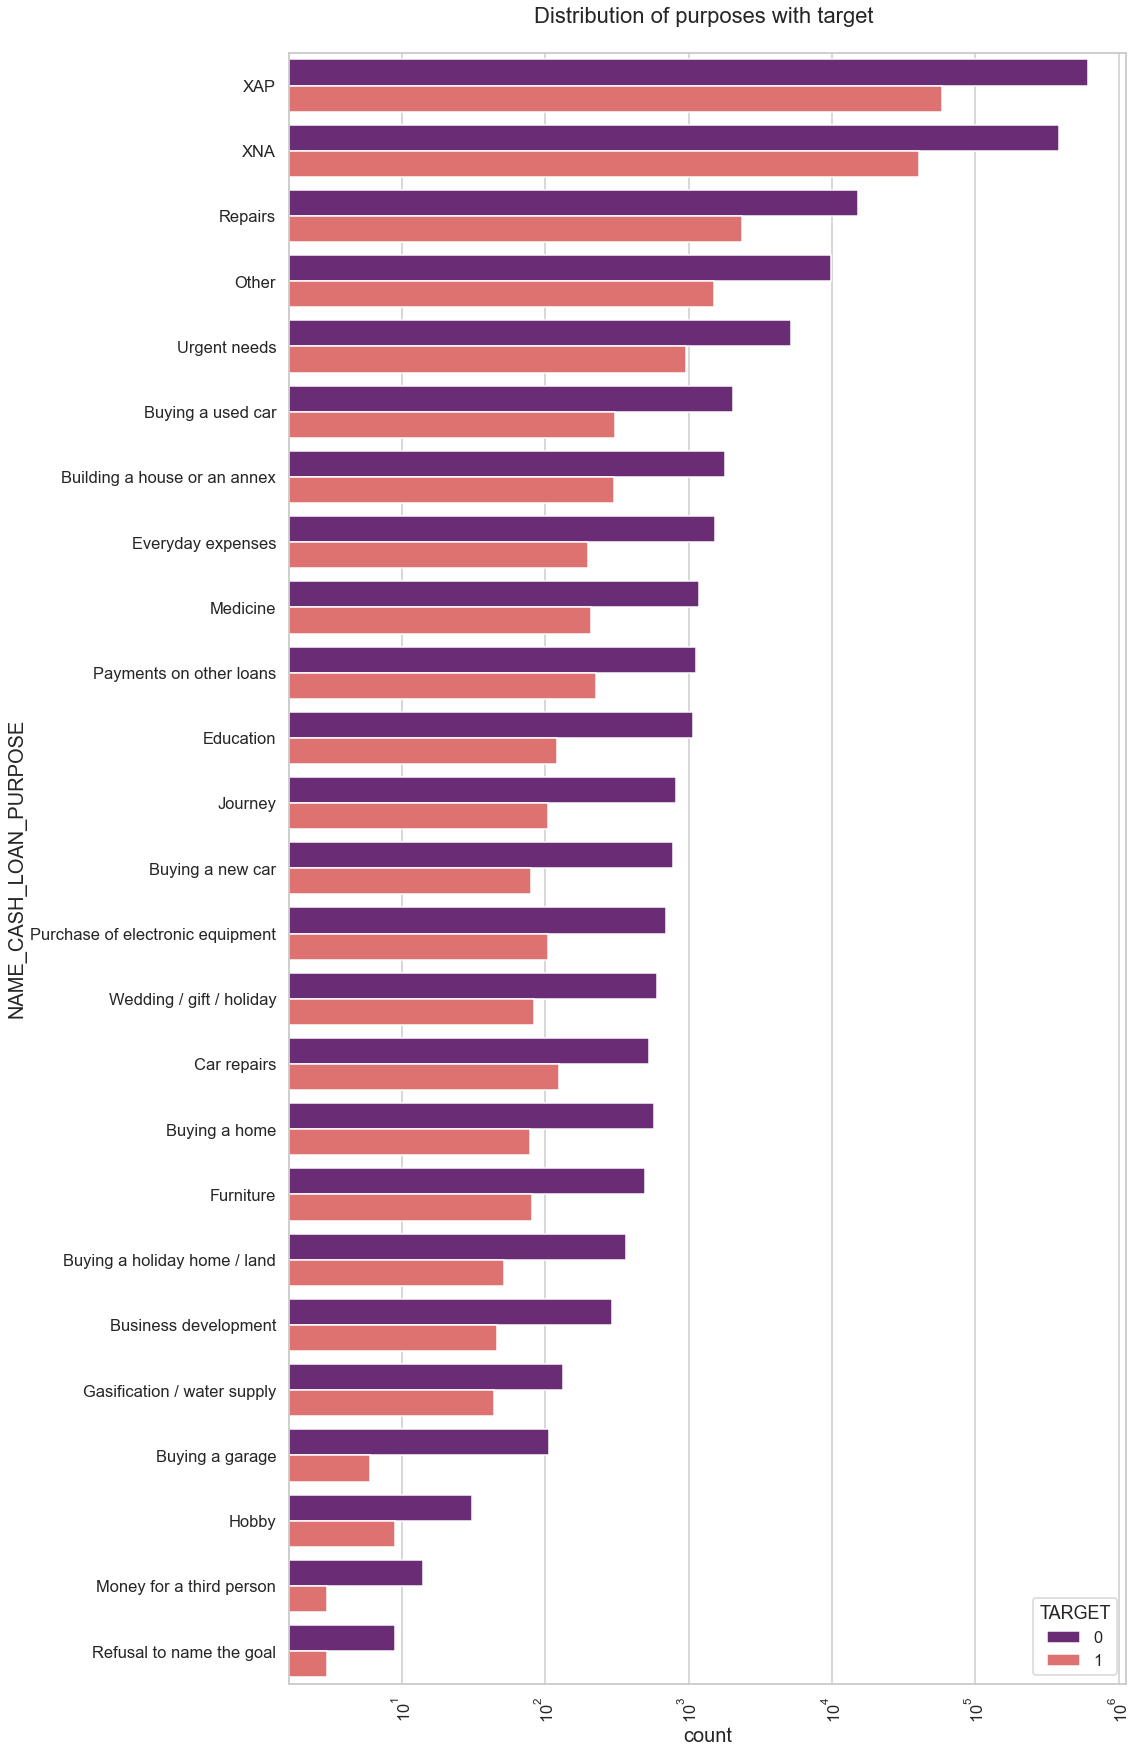

In [50]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 

#### Inferences
1. Customers that applied for loan for'Repairs' purpose are facing most difficulites in payment on time.
2. Few other Loan purposes where the customers are facing difficulties in paying installments are 'Other', 'Urgent needs', 'Buying a car', 'Building a house'. Hence we can focus on these categories to avoid difficulties.

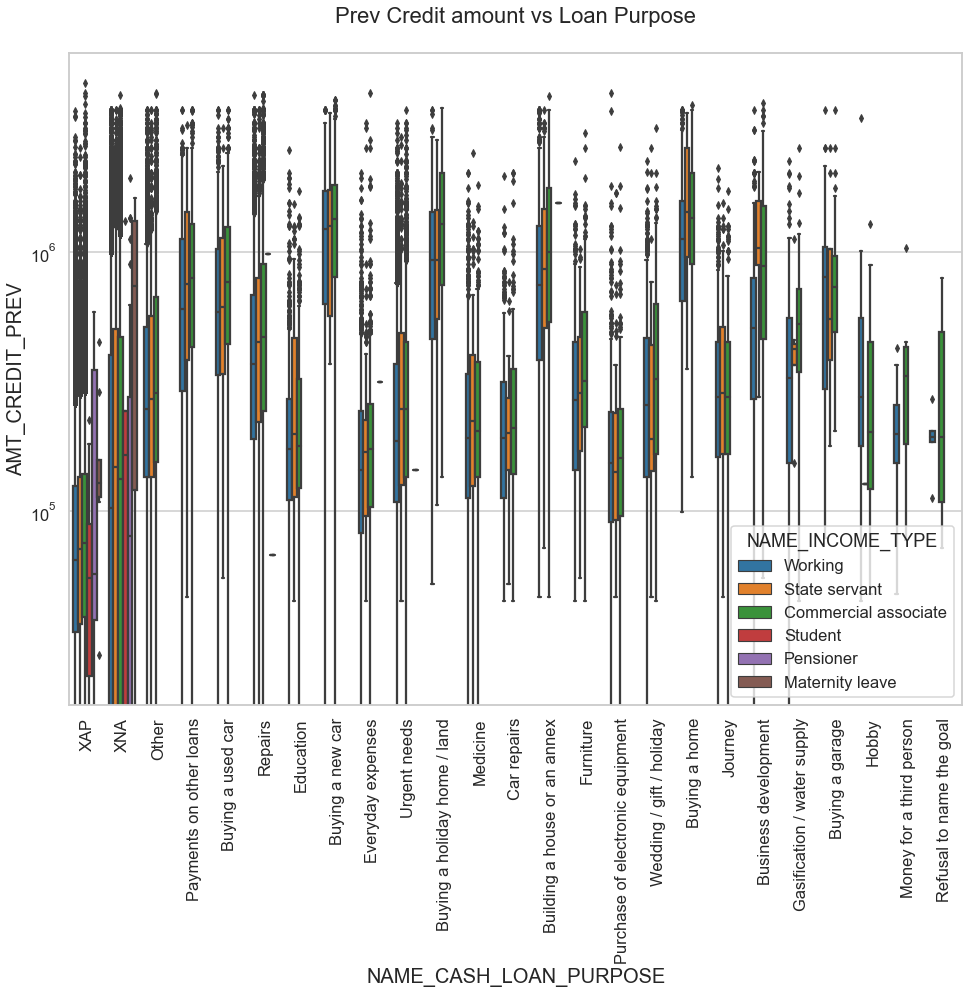

In [51]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

#### Inferences
1. The credit amount for Loan purposes 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher. 
2. 'State Servants' have applied for higher Credit amounts.
3. Loans applied with reason 'Money for third person' or 'Hobby' have been applied for lower credit amounts.

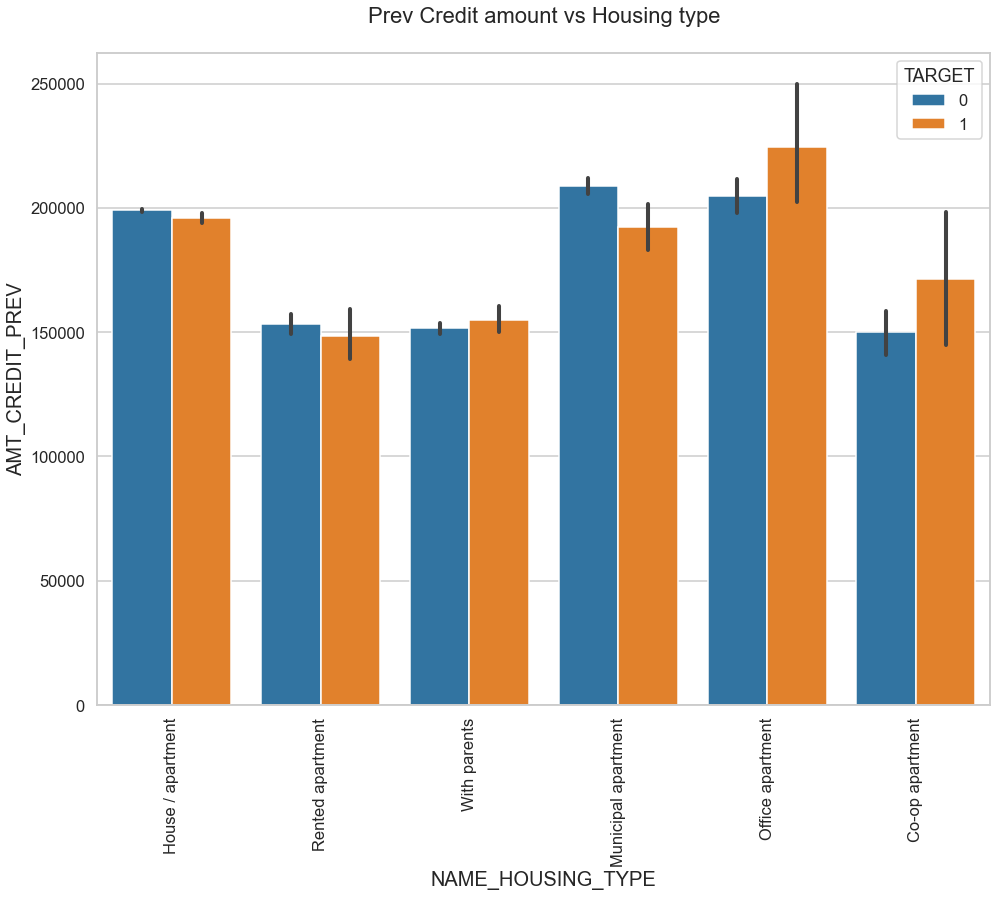

In [52]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

#### Inferences
1. Customers having 'Office apartment' have applied for higher credit and have slightly higher probability of having difficulties in paying installments.
2. Customers with a 'Co-op apartment' housing have a higher probability of having difficulties in payment of installments.
3. It can be concluded that the company can focus on customers with 'House/apartment' or 'Municipal apartment' types of housing to approve laons.

# Conclusions

#### Inferences summary
1. Cash loans are the targeted loan type to obtain a higher credit amount.
2. The probability of a loan getting rejected increases as the credit amount for the loan application increases.
3. Most rejected Cash loans and Consumer loans are rejected due to verification issues. So it may be understood from this information that Cash loans and Consumer loans might be major targets for defaulters or frauds to apply.
4. Majority of the customers applying for a loan belong to the income bracket of 100k-225k. This can be taken into consideration while contacting customers for a loan application.
5. Very few customers have an income above 400k, which means people that earn such high salaries often do not opt to take a loan.
6. The major categories of income types of the customers are 'Working', 'Commercial Associate', 'Pensioner', and 'State Servant'. So people of these categories can be treated as target customers by the company to attract business.
7. The major categories of Industry types where the customers work are: 'Business entity type 3', 'Self Employed', 'Other', 'Medicine', 'Government'. So the target customers can be described as someone from one of these industries.
8. The major categories of income types of customers that are facing difficulties in paying the loan installments are 'Working', 'Commercial associate', 'State Servant'.
9. The major categories of Organization types of customers that are facing difficulties in paying the loan installments are 'Business entity type 3', 'Self employed', 'Other', 'Medicine', 'Government'.
10. Customers that have applied for loans with reason as 'Other', 'Urgent needs', 'Buying a car', or 'Building a house' have been found to have most difficulties in paying the loan installments.
11. Most Customers that live in an Office apartment or Co-op apartment have difficulties in paying loan installments.
12. Least number of customers living in a House/apartment or a Municipal apartment have difficulties in paying loan installments.

#### So the target customers for the company to avoid defaulters can be defined as follows:
1. Loan Type - Cash Loans or Consumer Loans
2. Credit amount - Upto 200k
3. Income bracket - 100k-225k
4. Income type - 'Working', 'Commercial Associate', 'Pensioner', and 'State Servant'
5. Housing Type - 'House/apartment', 'Municipal apartment'